# Trabalho Final - Deep Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

Trabalho Final
==============

Criar um classificador de sentimento aplicando técnicas de PLN
--------------------------------------------------------------

Utilizando o dataset de revisões de filmes em português [1], criar um classificador de sentimentos que consiga um score na métrica F1 Score superior a 70%

Devem utilizar uma amostra de 20% e randon_state igual a 42 para testar as implementações e mensurar a métrica F1 Score (usar o parâmetro average = 'weighted') o restante dos dados devem ser utilizados para o treinamento (80%). Fique a vontade para testar métodos de pré-processamento, abordagens, algoritmos e bibliotecas, mas explique e justifique suas decisões.

O trabalho poderá ser feito em grupo de até 4 pessoas (mesmos grupos do Startup One).

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/imdb-reviews-pt-br.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

language = "text_pt" # palavras em portugues
# language = "text_en" # palavras em ingles
random_state = 42

# Importanto Dataset

In [2]:
# Carregamento do dataset para dataframe "df"
import os
import pandas as pd
try:
  import wget
except:
  !pip install wget

url = "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/imdb-reviews-pt-br.csv"
file = "./" + url.split('/')[-1]

if not os.path.exists(file):
    print("Fazendo download de " + url + " para: " + file)
    wget.download(url,file)

print("Carregando " + file + "...")
df = pd.read_csv(file, delimiter=',', encoding='UTF-8')
print("Dataframe carregado.")

Carregando ./imdb-reviews-pt-br.csv...
Dataframe carregado.


# 1. Manipulações

## 1.1 Exploração do dataset

In [3]:
print("Amostra do dataset:")
df.sample(10, random_state = random_state)

Amostra do dataset:


,id,text_en,text_pt,sentiment
12532,12534,This was unusual: a modern-day film which was ...,Isso era incomum: um filme moderno que era ult...,pos
35445,35447,Some of my old friends suggested me to watch t...,Alguns dos meus velhos amigos sugeriram que eu...,neg
20279,20281,What a pleasure. This is really a parody. Only...,Que prazer. Isto é realmente uma paródia. Some...,pos
2969,2971,There are about ten minutes about half way thr...,"Há cerca de dez minutos a meio da Strangeland,...",neg
45161,45163,"Othello, the classic Shakespearen story of lov...","Otelo, a clássica história de Shakespearen sob...",pos
42648,42650,"Bravo to Czechs, their once-powerful movie ind...","Bravo para os tchecos, sua outrora poderosa in...",pos
17897,17899,"So its not an award winner, so what? Have you ...","Então não é um vencedor do prêmio, e daí? Você...",pos
41126,41128,Guy Kibbee gives the viewer a lot of laughs. L...,Guy Kibbee dá muitas risadas ao espectador. Co...,pos
47609,47611,A remarkable example of cinematic alchemy at w...,Um exemplo notável de alquimia cinematográfica...,pos
44181,44183,"Steven Spielberg produced, wrote, came up with...","Steven Spielberg produziu, escreveu, surgiu co...",pos


In [4]:
df.info()

print("\nValores nulos:")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB

Valores nulos:


id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

In [5]:
print("Porcentagem de distribuição dos sentimentos")
(df.sentiment.value_counts()/df.shape[0])*100

Porcentagem de distribuição dos sentimentos


neg    50.071777
pos    49.928223
Name: sentiment, dtype: float64

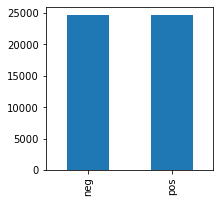

In [6]:

df.sentiment.value_counts().plot(kind='bar', figsize=(3,3));

In [7]:
# frequência de palavras de uma coluna de um dataset

from collections import Counter

def frequencia_de_palavras(quantidade, coluna):
    c = Counter()
    coluna.str.lower().str.split(" ").apply(c.update) # tranforma a descrição em minúsculas e depois separa as pelavras por "<espaço>" e retorna no formato de lista
    return c.most_common(quantidade)


In [8]:
# Frequência das 10 palavras mais comuns em Portugues
frequencia_de_palavras(10,df.text_pt)

[('de', 422154),
 ('que', 327261),
 ('e', 311782),
 ('o', 289805),
 ('a', 241726),
 ('um', 225146),
 ('é', 208453),
 ('não', 142163),
 ('em', 140213),
 ('uma', 136215)]

In [9]:
# frequência das 10 palavras mais comuns em Ingles
frequencia_de_palavras(10,df.text_en)

[('the', 612084),
 ('a', 303742),
 ('and', 301850),
 ('of', 272250),
 ('to', 251217),
 ('is', 195962),
 ('in', 171569),
 ('i', 140589),
 ('this', 135270),
 ('it', 125755)]

In [10]:
from nltk import word_tokenize
import nltk


## 1.2 Nuvem de Palavras

Building string of words...
Building wordcloud...


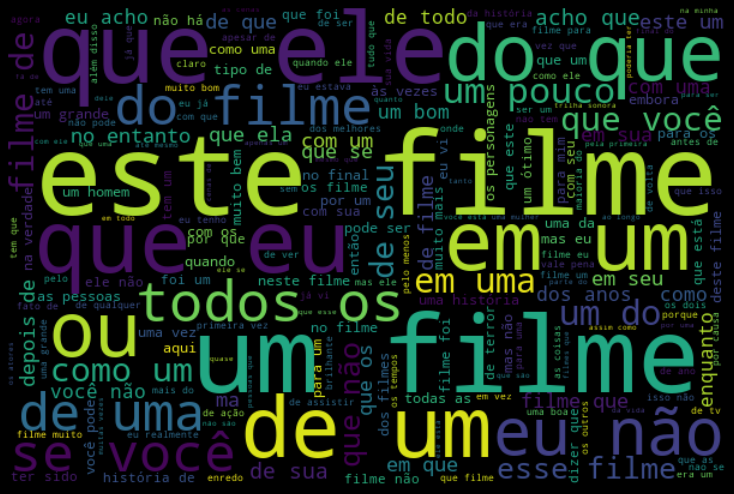

In [11]:

import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud

# Filtro de sentimento
sentimento = 'pos'

# dataframes
column_language = df[language] # Coluna <language> do dataset
column_sentiment_language = df[df.sentiment == sentimento][language] # Filtra coluna <language> por <sentimento>

# Construcao da string de palavras para o wordcloud
column = column_sentiment_language # escolha do dataframe
print("Building string of words...")
words = ''
for row in column:
  text = row.lower() # normalizando: transforma todo o texto da linha em minusculo
  for word in text: # adiciona palavra de cada linha na variavel words
    words += word

print("Building wordcloud...")
# Gera o wordcloud
wordcloud = WordCloud(width=600, height=400).generate(words)

# Plota wordcloud
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0) # Preenchimento entre a borda e a figura
plt.show()